# KMeans

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

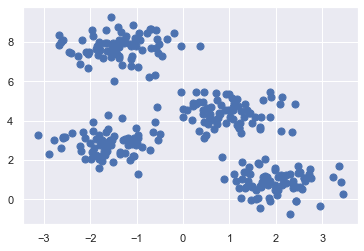

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, copy_x=True)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

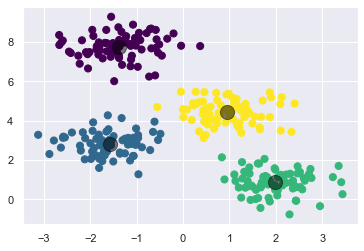

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

---

In [5]:
#simple K-means
def kmeans(k, X, iter_count=200):
    #init
    centers = X[np.random.choice(X.shape[0], k, replace=False)]
    predictions = np.zeros(X.shape[0], dtype=int)
    for i in range(iter_count):
        for j in range(X.shape[0]):
            predictions[j] = np.argmin(np.sum(((centers - X[j])**2), axis=-1), axis=-1)
        centers[:] = 0
        for j in range(X.shape[0]):
            centers[predictions[j],:] += X[j]
        for j in range(centers.shape[0]):
            centers[j] /= sum(predictions == j)
    return centers, predictions

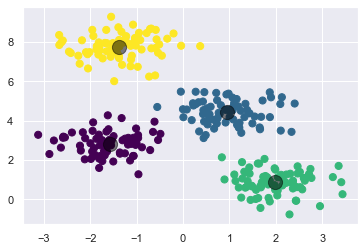

In [6]:
centers, pred = kmeans(4, X)
plt.scatter(X[:, 0], X[:, 1], c=pred, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [7]:
class KMeans:
    
    def __init__(self, k, method='random', max_iter=300):
        self.k = k 
        self.method = method
        self.max_iter = max_iter
        pass
    
    def init_centers(self, X):
        if self.method == 'random':
            return X[np.random.choice(X.shape[0], self.k, replace=False)]
        if self.method == 'k-means++':
            centroids = X[np.random.choice(X.shape[0], 1)]
            for k in range(self.k-1):
                dists = []
                for centroid in centroids:
                    dist = [np.linalg.norm(x - centroid) for x in X]
                    dists.append(dist)
                min_dist = [min(i) for i in zip(*dists)]
                probs = [i/sum(min_dist) for i in min_dist]
                centroids = np.vstack((centroids, X[np.random.choice(X.shape[0], 1, p=probs)]))
            return centroids
            
    def fit(self, X):
        self.centroids = self.init_centers(X)
        for _ in range(self.max_iter):
            clusters = self.expectation(X, self.centroids)
            new_centroids = self.maximization(X, clusters)
            if (new_centroids == self.centroids).all():
                break
            self.centroids = new_centroids
            
    def expectation(self, X, centroids):
        clusters = [[] for i in range(self.k)]
        for x in X:
            dist_dict = dict()
            for i, centroid in enumerate(centroids):
                dist_dict[i] = np.linalg.norm(x-centroid)
            sorted_dists = sorted(dist_dict.items(), key=lambda item: item[1])
            clusters[sorted_dists[0][0]].append(x)
        clusters = np.array([np.array(cluster) for cluster in clusters], dtype = object)
        return clusters

    def maximization(self, X, clusters):
        new_centroids = self.centroids.copy()
        for i, cluster in enumerate(clusters):
            new_centroids[i] = cluster.mean(axis = 0)
        return new_centroids
        
    def predict(self, X):
        predictions = []
        for x in X:
            dist_dict = dict()
            for i, centroid in enumerate(self.centroids):
                dist_dict[i] = np.linalg.norm(x-centroid)
            predictions.append(sorted(dist_dict.items(), key=lambda item: item[1])[0][0])
        return np.array(predictions)
    
    def predict_proba(self, X):
        probas = []
        for x in X:
            dists = [np.linalg.norm(x-centroid) for centroid in self.centroids]
            dists = np.array(dists, dtype=float)
            sum_dists = 0
            zero = []
            for i in range(len(dists)):
                if dists[i] != 0:
                    dists[i] = 1 / dists[i]
                    sum_dists += dists[i]
                else:
                    zero.append(i)
            dists /= sum_dists
            for i in zero:
                dists[i] = 1
            proba = dict()
            for i in range(len(self.centroids)):
                proba[i] = dists[i] / sum(dists)
            probas.append(proba)
        return np.array(probas)

In [8]:
kmeans = KMeans(k=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
probas = kmeans.predict_proba(X)

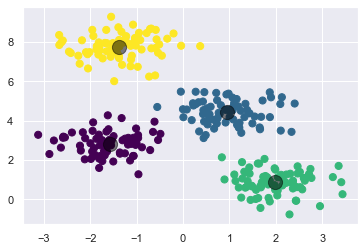

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);